In [25]:
# first run the following in the console:
# source ../venv/bin/activate

%matplotlib inline

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import pylab
from statsmodels.stats.inter_rater import fleiss_kappa

In [26]:
def binary_transform(x):
    if x == 2:
        return 1
    else:
        return 0

In [27]:
df = pd.read_csv('Data/travel/AA_annotated_dataset/AA_annotated_dataset.csv', index_col='id')

In [28]:
df.head()

,annotatedqualityhenrik,annotatedqualityenrico,annotatedqualitychristine,annotatedqualitymarit,thread_id,ANAN_hits_authority,ANAN_hits_hubs,ANAN_indegree,ANAN_pagerank,ARN_hits_authority,...,ty_sa,ty_scc,ty_sde,ty_sipc,ty_slp,ty_sp,ty_spr,ty_sscc,ty_typo,owneruserid
id,,,,,,,,,,,,,,,,,,,,,
269,2,1,2,1,269,0.000000,2.139766e-07,0.000000,0.000067,0.000018,...,0,0,0.166389,0,213,0,1,0,0,66.0
304,0,2,1,2,269,0.000035,4.772522e-07,4.000000,0.000687,0.000701,...,0,0,0.182274,0,155,0,0,0,1,9.0
434,1,1,1,1,269,0.000079,7.931472e-05,0.687103,0.000079,0.000079,...,0,0,0.150418,0,135,0,0,0,0,NaN
1044,2,2,2,2,1044,0.002147,5.213917e-03,27.000000,0.001215,0.004476,...,0,0,0.173410,0,94,0,0,0,0,44.0
1069,2,2,2,2,1044,0.000976,5.828991e-04,4.000000,0.000329,0.003980,...,0,0,0.158297,0,389,0,0,0,0,243.0


# Intra-annotators Agreement

In [29]:
# transform to binary annotations
df_agreement = pd.DataFrame()
df_agreement['annotatedqualityhenrik'] = df['annotatedqualityhenrik'].map(binary_transform)
df_agreement['annotatedqualityenrico'] = df['annotatedqualityenrico'].map(binary_transform)
df_agreement['annotatedqualitychristine'] = df['annotatedqualitychristine'].map(binary_transform)
df_agreement['annotatedqualitymarit'] = df['annotatedqualitymarit'].map(binary_transform)

In [30]:
# transform to categorical variables
df_agreement['annotatedqualityhenrik'] = df_agreement['annotatedqualityhenrik'].astype('category')
df_agreement['annotatedqualityenrico'] = df_agreement['annotatedqualityenrico'].astype('category')
df_agreement['annotatedqualitychristine'] = df_agreement['annotatedqualitychristine'].astype('category')
df_agreement['annotatedqualitymarit'] = df_agreement['annotatedqualitymarit'].astype('category')

In [31]:
# transform to: The categories are presented in the columns, while the subjects are presented in the rows.
# example: https://en.wikipedia.org/wiki/Fleiss%27_kappa#Worked_example
agreement_table = df_agreement.apply(pd.Series.value_counts, axis=1).fillna(0)

In [32]:
# Interpretation: FAIR AGREEMENT
# source: https://en.wikipedia.org/wiki/Fleiss%27_kappa#Interpretation
fleiss_kappa(agreement_table)

0.36272493042888321

# Pre-processing

In [33]:
# transform manual coding to binary quality labels
df['annotatedqualityhenrik'] = df['annotatedqualityhenrik'].map(binary_transform)
df['annotatedqualityenrico'] = df['annotatedqualityenrico'].map(binary_transform)
df['annotatedqualitychristine'] = df['annotatedqualitychristine'].map(binary_transform)
df['annotatedqualitymarit'] = df['annotatedqualitymarit'].map(binary_transform)

In [34]:
# take the MODE (most occurring value) of quality labels
df_quality = df[['annotatedqualityhenrik', 
                 'annotatedqualityenrico',  
                 'annotatedqualitychristine', 
                 'annotatedqualitymarit']].mode(axis=1)

# in case of parity, take the lowest (reasonable doubt it's Low other than High quality) 
df['quality'] = df_quality.min(axis=1)

# Summary Statistics

In [35]:
df.describe()

,annotatedqualityhenrik,annotatedqualityenrico,annotatedqualitychristine,annotatedqualitymarit,thread_id,ANAN_hits_authority,ANAN_hits_hubs,ANAN_indegree,ANAN_pagerank,ARN_hits_authority,...,ty_scc,ty_sde,ty_sipc,ty_slp,ty_sp,ty_spr,ty_sscc,ty_typo,owneruserid,quality
count,295.000000,295.00000,295.000000,295.000000,295.000000,2.950000e+02,295.000000,295.000000,295.000000,295.000000,...,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,289.000000,295.000000
mean,0.694915,0.80000,0.677966,0.745763,31075.267797,1.172425e-02,0.006403,73.420755,0.005701,0.008190,...,0.013559,0.174062,0.016949,210.057627,0.023729,0.023729,0.013559,0.037288,11245.491349,0.701695
std,0.461226,0.40068,0.468050,0.436172,23735.922627,2.433486e-02,0.013811,133.360627,0.010129,0.016086,...,0.115849,0.016891,0.174138,124.087308,0.173341,0.152462,0.115849,0.189789,13528.212032,0.458292
min,0.000000,0.00000,0.000000,0.000000,269.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.081633,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,0.000000,1.00000,0.000000,0.000000,10078.000000,1.380000e-61,0.000001,0.687103,0.000074,0.000019,...,0.000000,0.164289,0.000000,134.000000,0.000000,0.000000,0.000000,0.000000,1219.000000,0.000000
50%,1.000000,1.00000,1.000000,1.000000,22687.000000,1.001058e-03,0.000419,12.000000,0.000970,0.001068,...,0.000000,0.173977,0.000000,182.000000,0.000000,0.000000,0.000000,0.000000,4188.000000,1.000000
75%,1.000000,1.00000,1.000000,1.000000,47057.000000,8.870536e-03,0.003676,85.000000,0.005548,0.009552,...,0.000000,0.182552,0.000000,252.500000,0.000000,0.000000,0.000000,0.000000,22037.000000,1.000000
max,1.000000,1.00000,1.000000,1.000000,77776.000000,1.127512e-01,0.047720,632.000000,0.043754,0.077171,...,1.000000,0.292922,2.000000,1254.000000,2.000000,1.000000,1.000000,1.000000,48238.000000,1.000000


In [36]:
df.std()

annotatedqualityhenrik                0.461226
annotatedqualityenrico                0.400680
annotatedqualitychristine             0.468050
annotatedqualitymarit                 0.436172
thread_id                         23735.922627
ANAN_hits_authority                   0.024335
ANAN_hits_hubs                        0.013811
ANAN_indegree                       133.360627
ANAN_pagerank                         0.010129
ARN_hits_authority                    0.016086
ARN_hits_hubs                         0.010823
ARN_indegree                        341.776808
ARN_pagerank                          0.007345
CBEN_hits_authority                   0.014519
CBEN_hits_hubs                        0.008184
CBEN_indegree                       150.173343
CBEN_pagerank                         0.013033
best_answer                           0.474168
cooccurrence_degree_centrality        0.081096
nr_bestanswers                      137.156474
nr_days_since_signup                583.835985
nr_posts     

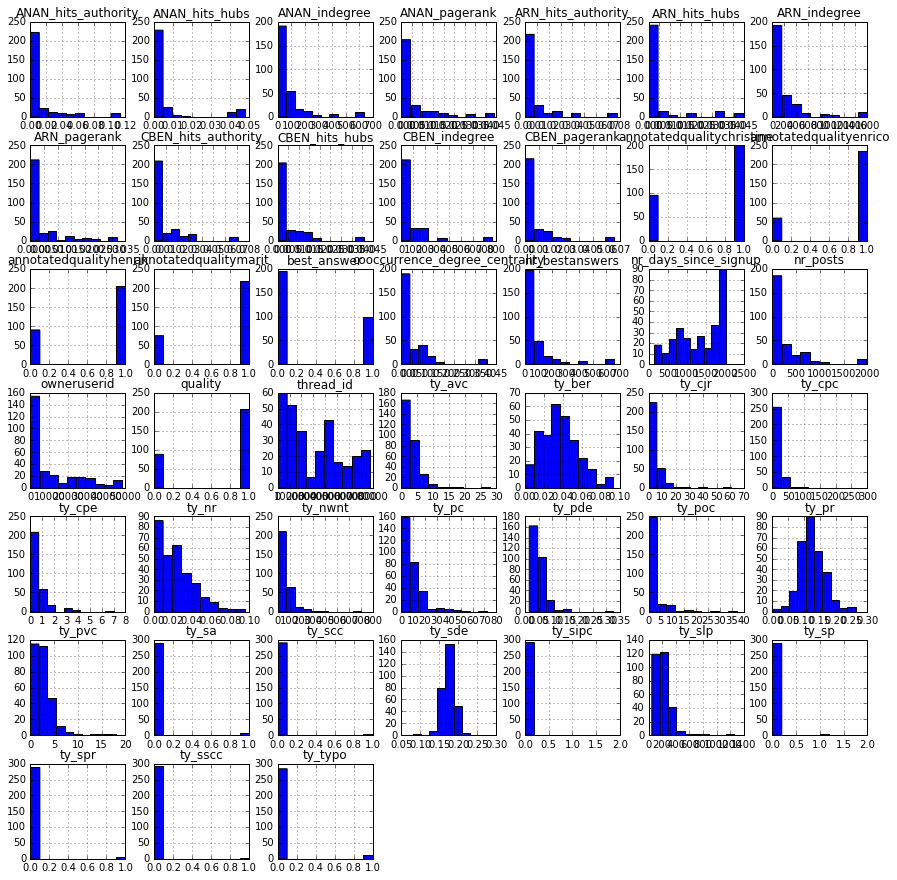

In [45]:
pylab.rcParams['figure.figsize'] = (15.0, 15.0)
_ = df.hist()
plt.tight_layout()

# Logistic Regression on same 

In [38]:
# TODO do I need to add an intercept? 
# http://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/

In [74]:
cols_IV = ['cooccurrence_degree_centrality', 'nr_posts', 'nr_bestanswers', 'nr_days_since_signup']

logit = sm.Logit(df['quality'], df[cols_IV])
result = logit.fit()
print "\n\nSummary:"
print result.summary()

Optimization terminated successfully.
         Current function value: 0.619793
         Iterations 5


Summary:
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                  295
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                            3
Date:                Tue, 13 Jun 2017   Pseudo R-squ.:                -0.01702
Time:                        15:04:30   Log-Likelihood:                -182.84
converged:                       True   LL-Null:                       -179.78
                                        LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
cooccurrence_degree_centrality     3.1666     12.231     

In [71]:
cols_IV = [u'ANAN_hits_authority', u'ANAN_hits_hubs', u'ANAN_indegree', u'ANAN_pagerank', 'nr_posts', 'nr_bestanswers', 'nr_days_since_signup']

logit = sm.Logit(df['quality'], df[cols_IV])
result = logit.fit()
print "\n\nSummary:"
print result.summary()

Optimization terminated successfully.
         Current function value: 0.614182
         Iterations 6


Summary:
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                  295
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            5
Date:                Tue, 13 Jun 2017   Pseudo R-squ.:               -0.007812
Time:                        15:02:57   Log-Likelihood:                -181.18
converged:                       True   LL-Null:                       -179.78
                                        LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
ANAN_hits_authority    -48.2240     31.457     -1.533      0.125    -109.879 

In [72]:
cols_IV = [u'ARN_hits_authority', u'ARN_hits_hubs',
       u'ARN_indegree', u'ARN_pagerank', 'nr_posts', 'nr_bestanswers', 'nr_days_since_signup']

logit = sm.Logit(df['quality'], df[cols_IV])
result = logit.fit()
print "\n\nSummary:"
print result.summary()

Optimization terminated successfully.
         Current function value: 0.616528
         Iterations 6


Summary:
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                  295
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                            6
Date:                Tue, 13 Jun 2017   Pseudo R-squ.:                -0.01166
Time:                        15:03:25   Log-Likelihood:                -181.88
converged:                       True   LL-Null:                       -179.78
                                        LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
ARN_hits_authority     -25.3334     45.316     -0.559      0.576    -114.151 

In [73]:
cols_IV = [u'CBEN_hits_authority',
       u'CBEN_hits_hubs', u'CBEN_indegree', u'CBEN_pagerank', 'nr_posts', 'nr_bestanswers', 'nr_days_since_signup']

logit = sm.Logit(df['quality'], df[cols_IV])
result = logit.fit()
print "\n\nSummary:"
print result.summary()

Optimization terminated successfully.
         Current function value: 0.617749
         Iterations 6


Summary:
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                  295
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                            6
Date:                Tue, 13 Jun 2017   Pseudo R-squ.:                -0.01366
Time:                        15:03:53   Log-Likelihood:                -182.24
converged:                       True   LL-Null:                       -179.78
                                        LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
CBEN_hits_authority    -19.1660    100.785     -0.190      0.849    -216.702 

In [77]:
cols_IV = [u'cooccurrence_degree_centrality', u'ANAN_pagerank', u'ARN_pagerank', u'CBEN_pagerank', 'nr_posts', 'nr_bestanswers', 'nr_days_since_signup']

logit = sm.Logit(df['quality'], df[cols_IV])
result = logit.fit()
print "\n\nSummary:"
print result.summary()

Optimization terminated successfully.
         Current function value: 0.612495
         Iterations 6


Summary:
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                  295
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                            6
Date:                Tue, 13 Jun 2017   Pseudo R-squ.:               -0.005044
Time:                        15:05:49   Log-Likelihood:                -180.69
converged:                       True   LL-Null:                       -179.78
                                        LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
cooccurrence_degree_centrality    44.6025     27.548     

## A model for each user

In [69]:
cols_IV = ['cooccurrence_degree_centrality', 'nr_posts', 'nr_bestanswers', 'nr_days_since_signup']
    
for name, group in df.groupby(u'thread_id'):
    print "********************" + "********************" + "********************"
    if int(name) == 1153:
        logit = sm.Logit(group['quality'], group[cols_IV])
        result = logit.fit()

************************************************************
************************************************************
************************************************************


PerfectSeparationError: Perfect separation detected, results not available

In [68]:
df[['quality', 'cooccurrence_degree_centrality', 'nr_posts', 'nr_bestanswers', 'nr_days_since_signup', 'thread_id']].sort_values('thread_id')

,quality,cooccurrence_degree_centrality,nr_posts,nr_bestanswers,nr_days_since_signup,thread_id
id,,,,,,
269,0.0,0.001031,4.00000,0.000000,2025.000000,269
304,0.0,0.008725,25.00000,4.000000,2025.000000,269
434,0.0,0.000810,3.66362,0.631632,792.306676,269
9767,0.0,0.003173,13.00000,4.000000,1696.000000,269
1044,1.0,0.049972,219.00000,28.000000,2025.000000,1044
1069,1.0,0.028556,86.00000,4.000000,2017.000000,1044
1153,1.0,0.129055,641.00000,87.000000,2023.000000,1153
53807,0.0,0.000635,6.00000,0.000000,571.000000,1153
1544,1.0,0.115967,658.00000,197.000000,2025.000000,1153


In [44]:
# check annotation vs users rating
